In [6]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
#
# dig this module for the algorithms
from aggllomerative import hierarchy
# dig this module for the algorithms
#
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 


from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics.pairwise import euclidean_distances

/usr/local/lib/python3.9/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /Users/amirosein/Documents/UniversityDocs/SRB/DataMining/project/clustering/aggllomerative/_hierarchy.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
/Users/amirosein/.pyxbld/temp.macosx-12-x86_64-cpython-39/pyrex/aggllomerative/_hierarchy.c:698:10: fatal error: 'numpy/arrayobject.h' file not found
#include "numpy/arrayobject.h"
         ^~~~~~~~~~~~~~~~~~~~~
1 error generated.


ImportError: Building module aggllomerative._hierarchy failed: ["distutils.errors.CompileError: command '/usr/bin/clang' failed with exit code 1\n"]

In [5]:
file_name = "./LatLong.csv"
df = pd.read_csv(
    file_name,
    sep = ','
)

print(df.head())

X = df.values
X[:,0]

# remove Id collumn :
# df = df.drop(['id'],axis=1)
# df.head()

   Longitude  Latitude
0  36.861544 -5.177747
1  51.463766  5.392935
2  51.190492  4.453765
3  51.326247  6.085953
4  51.463766  5.392935


array([36.861544, 51.463766, 51.190492, ..., 51.973487, 50.2074  ,
       37.290131])

In [ ]:
plt.rcParams["figure.figsize"] = (10,8.8)
plt.scatter(X[:, 0], X[:, 1], marker='+')

In [ ]:
dist_matrix = euclidean_distances(X,X)
type(dist_matrix)

In [13]:
Z = hierarchy.linkage(dist_matrix, 'average')


/var/folders/nv/chhw1tnj3bg3cgprp82kwjsh0000gr/T/ipykernel_53869/2692532541.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'average')


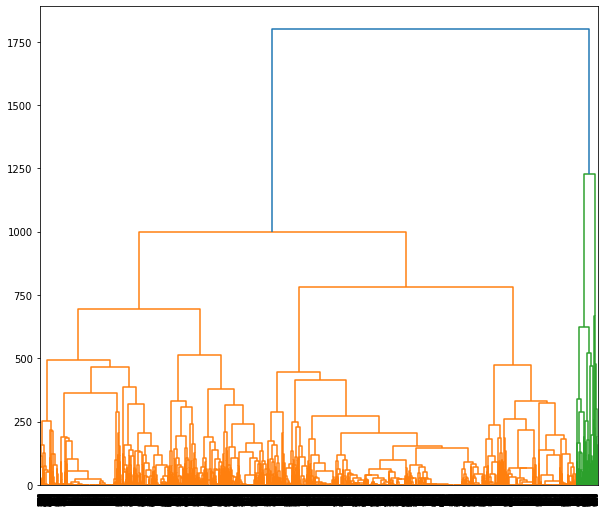

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

dendro = hierarchy.dendrogram(Z, ax=ax)

/var/folders/nv/chhw1tnj3bg3cgprp82kwjsh0000gr/T/ipykernel_53869/2849418456.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'average')


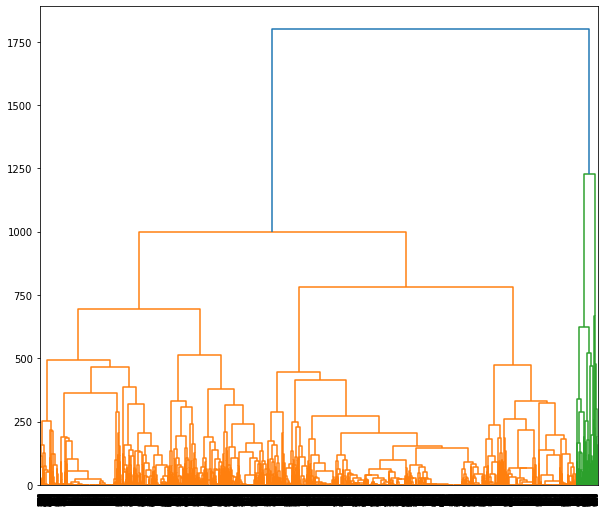

In [18]:
Z = hierarchy.linkage(dist_matrix, 'complete')

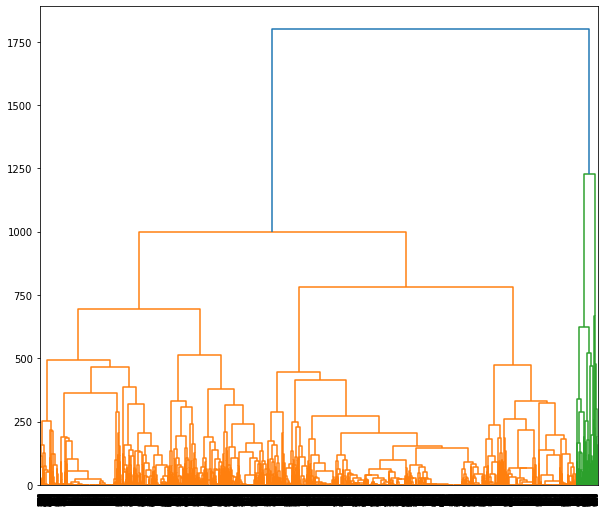

In [24]:
ax = fig.add_subplot(1, 1, 1)
dendro = hierarchy.dendrogram(Z,)

In [25]:
clustering = AgglomerativeClustering().fit(X)
clustering.labels_

array([0, 1, 1, ..., 1, 1, 1])

In [31]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


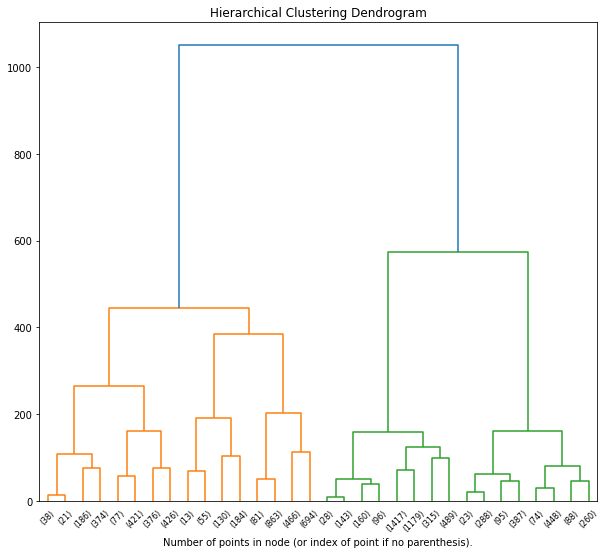

In [37]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()